# *Lecture 20*

# Partial Differential Equations: Applications in Electrostatics

| |
|:---:|
|Selected Content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|

## Follow-up on Successive Over-Relaxation (SOR)

During the last lecture, I introduced an expression describing "over-relaxation" of the iterative solution:

$$\begin{align}
\bar{y}_i^{(j)} &= y_i^{(j)} + \alpha \left[ y_i^{(j)} - y_i^{(j-1)} \right]\\
&= (1+\alpha) y_i^{(j)} - \alpha y_i^{(j-1)}
\end{align}$$

In this expression, $y_i^{(j-1)}$ is the previous iteration's "over-relaxed solution," $y_i^{(j)}$ is the current iteration's Jacobi or Gauss-Seidel estimate, and $\bar{y}_i^{(j)}$ is the current iteration's over-relaxed solution.

In this form, we expect $\alpha \in [0,1]$, and $\alpha=0$ corresponds to no relaxation.

An alternative form (or standard form) -- as defined by [MathWorld](http://mathworld.wolfram.com/SuccessiveOverrelaxationMethod.html), [Wikipedia](https://en.wikipedia.org/wiki/Successive_over-relaxation), and our textbook (Eqns. 19.33-19.35) -- is

$$\bar{y}_i^{(j)} = \omega y_i^{(j)} + (1-\omega) y_i^{(j-1)}$$

In this expression, $\omega \in [0,2]$, and $\omega=1$ corresponds to no relaxation (Gauss-Seidel method).

We can see, by comparing the two expressions, that $\omega = 1 + \alpha$ and $-\alpha = 1-\omega$.

That is,

$$\omega = 1 \Longleftrightarrow \alpha = 0$$

The conclusion is that these two expressions are the same.
The big difference is that the second expression for SOR includes the possibility of $\omega < 1$, and this is non-physical for the first expression.
The case of $\omega < 1$ corresponds to *under-relaxation*, meaning that the solution step does not go as far as the Jacobi or Gauss-Seidel methods would imply.

W. Kahan showed in 1958 that SOR converges if $\omega \in [0,2]$.
This is equivalent to $\alpha \in [-1,1]$.
It is interesting that $\alpha < 0$ ($\omega < 1$) can still converge to a solution.

# Partial Differential Equations

Because many physical systems evolve in both space and time, partial differential equations are an important part of computational physics.
The solutions to these equations may be complex, but as long as the equations themselves are defined, our efforts toward a numerical solution are limited only by computer time.

## Definitions and Classifications

The most general form for a PDE with two independent variables is

$$A \frac{\partial^2 U}{\partial x^2}+ B \frac{\partial^2 U}{\partial
x \partial y}+C \frac{\partial^2 U}{\partial y^2} + D \frac{\partial U}{\partial x}+E
\frac{\partial U}{\partial y} =F$$

where $A$, $B$, $C$, $D$, $E$, and $F$ are arbitrary functions of the variables
$x$ and $y$. Often we will have $D=E=0$ -- no first derivative terms.

Some simple observations:
* If $B=0$ and $C=0$, then we can have a 1+1-dimensional diffusion equation (a *parabolic* partial differential equation)
$$\frac{\partial^2 U}{\partial x^2} = \alpha \frac{\partial U}{\partial t}$$
* If $B=0$ and $AC<0$, then we can have a 1+1-dimensional wave equation (a *hyperbolic* PDE)
$$\frac{\partial^2 U}{\partial x^2} - \frac{1}{v^2}\frac{\partial^2 U}{\partial t^2} = 0$$
* If $B=0$ and $AC>0$, then we can have a 2-dimensional Laplace/Poisson's equation (an *elliptic* PDE)
$$\frac{\partial^2 U}{\partial x^2} + \frac{\partial^2 U}{\partial y^2} = 0$$

In the table below we define the classes of PDE’s by the
value of the discriminant $d=AC-B^2$.
(Some of these classifications are not immediately obvious, but it may help to think back to the concrete examples above.)

|   *Elliptic (general form)*   | *Parabolic (general form)* | *Hyperbolic (general form)* | 
| :----------: | :-----------: | :------------: | 
| $d=AC-B^2>0$ | $d=AC-B^2=0$ | $d=AC-B^2<0$ |
| $\nabla^2 U(x) = -4\pi\rho(x)$ | $\nabla^2 U(\mathbf{x},t) =a \partial U/\partial t$        | $\nabla^2 U(\mathbf{x},t)=c^{-2}\partial^2 U/\partial t^2\mbox{}$  |


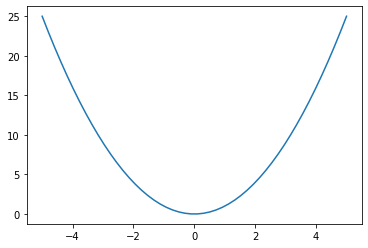

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

B = np.linspace(-5,5,50)
C = 1
A = B**2 / C # parabolic form
plt.plot(B,A)
plt.show()

### Boundary Conditions

We also define the type of boundary condition for the case at hand.
If the boundary condition is
the value of the solution on a surrounding closed surface, we have a
*Dirichlet boundary condition*. If the boundary condition is the value
of the normal derivative on the surrounding surface, we have a *Neumann
boundary condition*. If the values of both the solution and its
derivative are specified on a closed boundary, we have a *Cauchy
boundary condition.*

## Application: Electrostatic Potential

We will skip over the diffusion equation (parabolic PDE) for now, but we will come back to it during the next lecture.

We will focus instead on the solution for an electrostatic potential $U$, as defined by either Poisson's equation (with a source charge density $\rho$) or Laplace's equation (no charges: $\rho=0$).

$$\nabla^2 U(\textbf{x}) = - 4 \pi \rho(\textbf{x})$$

Our example problem is to find the electric potential for all points
inside the charge-free square shown below. 

<img src="Figures/Figure_19.1a.png" width="20%">

The bottom and
sides of the region are made up of wires that are “grounded” (kept at 0
V). The top wire is connected to a voltage source that keeps it at a
constant 100 V.
These defined voltage levels are the boundary conditions on the closed boundary: a Dirichlet closed surface condition.

To proceed with our multi-dimensional numerical methods, we rewrite the equation in a convenient coordinate system.  For this square system, we write the equation in 2-D rectangular coordinates:

$$\frac{\partial^2 U(x,y)}{\partial x^2}+ \frac{\partial^2
U(x,y)}{\partial y^2 } = - 4 \pi \rho(\textbf{x})$$

The potential depends simultaneously on $x$
and $y$, but there is no time dependence. 
For Laplace’s equation, the charges, which are the source of
the field, enter indirectly by specifying the potential values in some
region of space; for Poisson’s equation they enter directly.


### Finite-Difference Algorithm

When we solved an ODE, we divided a single dimension into a "grid" of points so that we could approximate a derivative with a finite difference.

Now we divide this 2-D space into a grid or lattice, and we solve for the potential $U$ at each point in the lattice.
Remember that this is an approximation to the true result, since we are not truly accounting for the differential effects from points infinitesimally close to each other.
We will also have to interpolate between grid points.

<img src="Figures/Figure_19.3.png" width="50%">

In order to approximate the derivatives, we use the Taylor series to expand $U$ in the $x$ direction about the point $(x,y)$.
We do this in both directions (forward and backward in $x$), with the plan of canceling terms of order $\Delta x$ and keeping terms no larger than $\mathcal{O}[(\Delta x)^2]$.

$$\begin{align}
U(x +\Delta x, y) & = U(x,y) + \frac{\partial U}{\partial x}\Delta x + \frac{1}{2}
\frac{\partial^2 U}{\partial x^2}(\Delta x)^2 + \cdots \\
U(x -\Delta x, y) & = U(x,y) - \frac{\partial U}{\partial x}
\Delta x + \frac{1} {2} \frac{\partial^2 U}{\partial x^2} (\Delta
x)^2 - \cdots\\
\end{align}$$

Now we do the same for the $y$ direction.
Note that there are no correlated "cross terms" like $\partial U/\partial x \partial y$ in Poisson's equation, so we are allowed to treat the movement in $x$ and $y$ as separate steps.

$$\begin{align}
U(x, y +\Delta y) & = U(x,y) + \frac{\partial
U}{\partial y}\Delta y + \frac{1}{2} \frac{\partial^2 U}{\partial y^2}(\Delta y)^2 +
\cdots\\
U(x, y -\Delta y) & = U(x,y) - \frac{\partial U}{\partial y}
\Delta y + \frac{1} {2} \frac{\partial^2 U}{\partial y^2} (\Delta
y)^2 - \cdots
\end{align}$$

When we add these
equations in pairs, all of the $\Delta x$ and $\Delta y$ terms cancel.

The result is just the good old midpoint algorithm for second derivatives, good to order $(\Delta x)^4$:

$$\begin{align}
\frac{\partial^2 U(x,y)}{\partial x^2}& \simeq   \frac{U(x+\Delta
x,y)+U(x-\Delta x,y)-2 U(x,y)}{(\Delta x)^2}\\
\frac{\partial^2 U(x,y)}{\partial y^2} & \simeq   \frac{U(x,y+\Delta y) +U(x, y-\Delta y)-2 U(x,y)}{(\Delta
y)^2}
\end{align}$$

Now we will substitute this second-derivative approximation into the differential equation:

$$\begin{align}
&\frac{U(x+\Delta x,y) + U(x-\Delta x,y)-2 U(x,y)}{(\Delta x)^2}\\
&\qquad + \frac{U(x,y+\Delta y) + U(x,y-\Delta y)-2 U(x,y)}{(\Delta y)^2} =
-4\pi\rho
\end{align}$$ 

If $\Delta x = \Delta y = h$ (which is quite common in these spatial grids), then the equation can be re-written in analogy with the 1-D case:

$${U(x+h,y) + U(x-h,y)}+ {U(x,y+h) +
U(x,y-h)- 4 U(x,y) } =  -4\pi\rho h^2$$
  
It may be enlightening to stop here for a moment and reflect on the meaning of the factor of 4 multiplying $U(x,y)$.

If we consider the grid coordinates as $x_i$ and $y_i$ (as for the 1-D case), then
the solution for $U(x_i, y_j)$ itself is 

$$\boxed{U_{i,j} =\frac{1}{4} \left[U_{i+1,j}+U_{i-1,j}
 + U_{i,j+1} + U_{i,j-1} \right]+ \pi\rho_{i,j}h^2}$$
 
The $h^2$ factor in Poisson's equation is interesting.
It comes about because $\rho$ is only a charge density at a point.
In order to solve the finite difference equation, we must have the total charge over some small but finite area.
If there is a point source charge, then $\rho(x_i, y_j)$ will be $q/h^2$ on average, and the contribution to the equation for $U$ will be $q$ again.

### Solving the Finite Difference Equations

Since we have a grid of values for $U$ and $\rho$, we could write the entire system of equations in matrix form.
Generally, there should be $N \times N$ equations, if we assume the $x$ and $y$ intervals are the same.
Some of the equations will be boundary conditions (Dirichlet or Neumann).
In principle, this system can be solved with linear algebra techniques (LU decomposition and inversion).
In practice, a very large matrix equation is more easily solved by iterative techniques.

We cannot simply start at a boundary and walk our way across the plane, calculating $U$ at each points along the way, because we do not know the value of $U$ at all of the neighboring points.
Instead, we use the Jacobi method or the Gauss-Seidel method to iterate the system and expect it to relax to a stable solution.

Here is the algorithm for the Jacobi method:
1. Make an initial guess for $U_{i,j}$ in the interior points.  (This assumes you have already fixed the values of $U$ at the boundaries, as appropriate.)
2. Use the boxed equation to calculate $U_{i,j}^m$ for each iteration $m$.
3. Stop the iteration if the convergence criterion is satisfied.
4. Update all values of $U_{i,j}$ and go to Step 2.

The Gauss-Seidel method converges faster because it uses some values from the current iteration to update $U_{i,j}$.

In the following example of the Gauss-Seidel method, we assume $\rho=0$ everywhere and $h=1$.
The physical example is the surface in Figure 19.1.

<IPython.core.display.Javascript object>


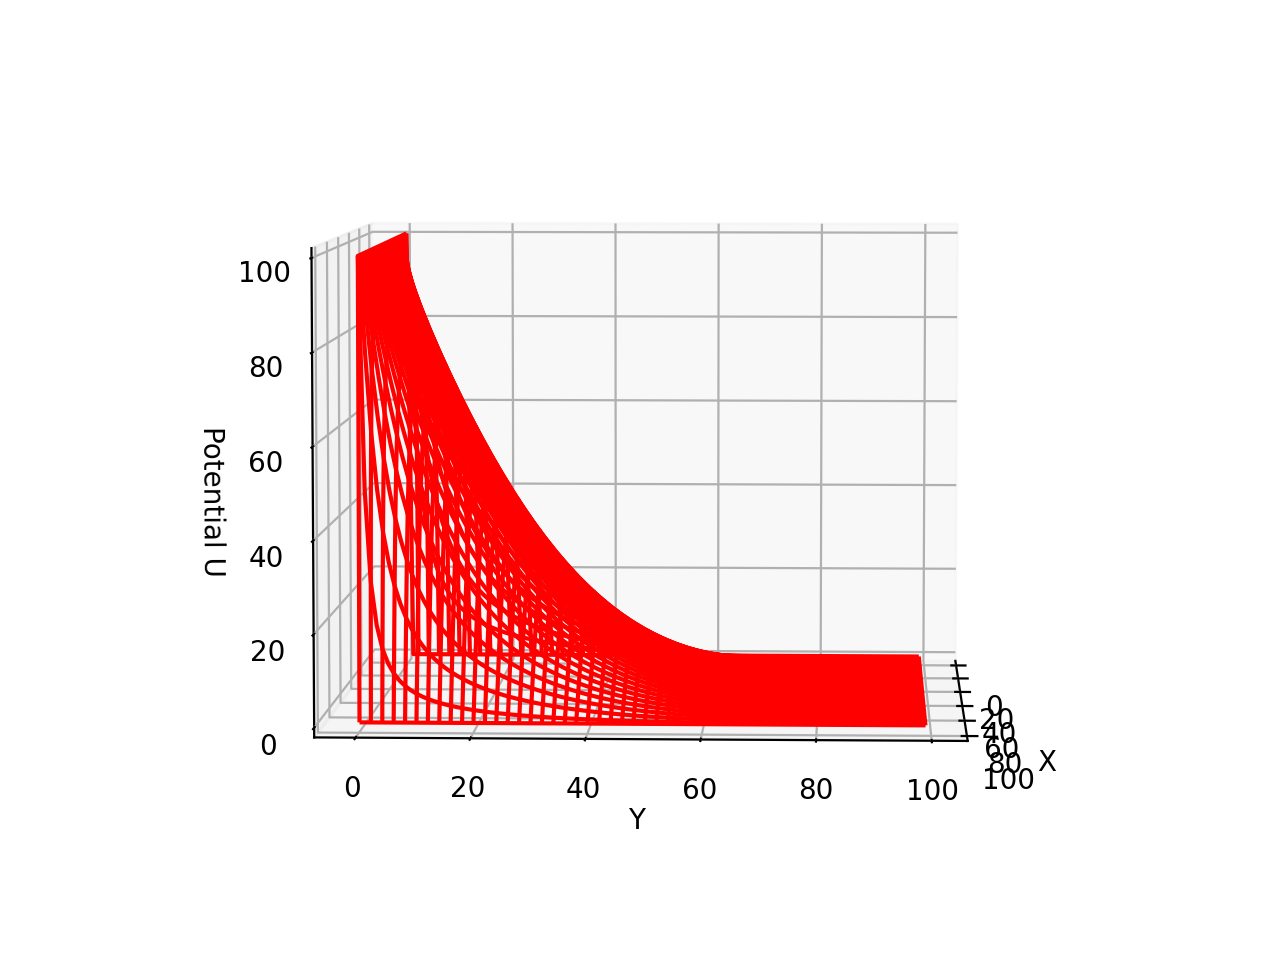

In [2]:
%matplotlib notebook
# LaplaceLine.py, Notebook Version

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Nmax = 100
Niter = 1000
V = np.zeros((Nmax, Nmax))   

for k in range(0, Nmax-1): 
    V[k,0] = 100.0                              # fixed potential line at 100V
    
for iter in range(Niter):                       # iterations over algorithm
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])  
x = range(0, Nmax)
y = range(0, Nmax)
X, Y = np.meshgrid(x,y)          

def functz(V):                                  # Function returns V(x, y)
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = plt.figure()                              # Create figure
ax = Axes3D(fig, auto_add_to_figure=False)      # Plots axes
fig.add_axes(ax)
ax.plot_wireframe(X, Y, Z, color = 'r')         # red wireframe
ax.set_xlabel('X')                              # label axes
ax.set_ylabel('Y')
ax.set_zlabel('Potential U')
plt.show()  

This potential should trend gradually from 100 to 0.  It should be linear in the center.  If it is not, then the iteration has not converged.

We can incorporate arbitrary boundary conditions in the system.  Here we require that the left edge of the square also be kept at 100 V.

<IPython.core.display.Javascript object>


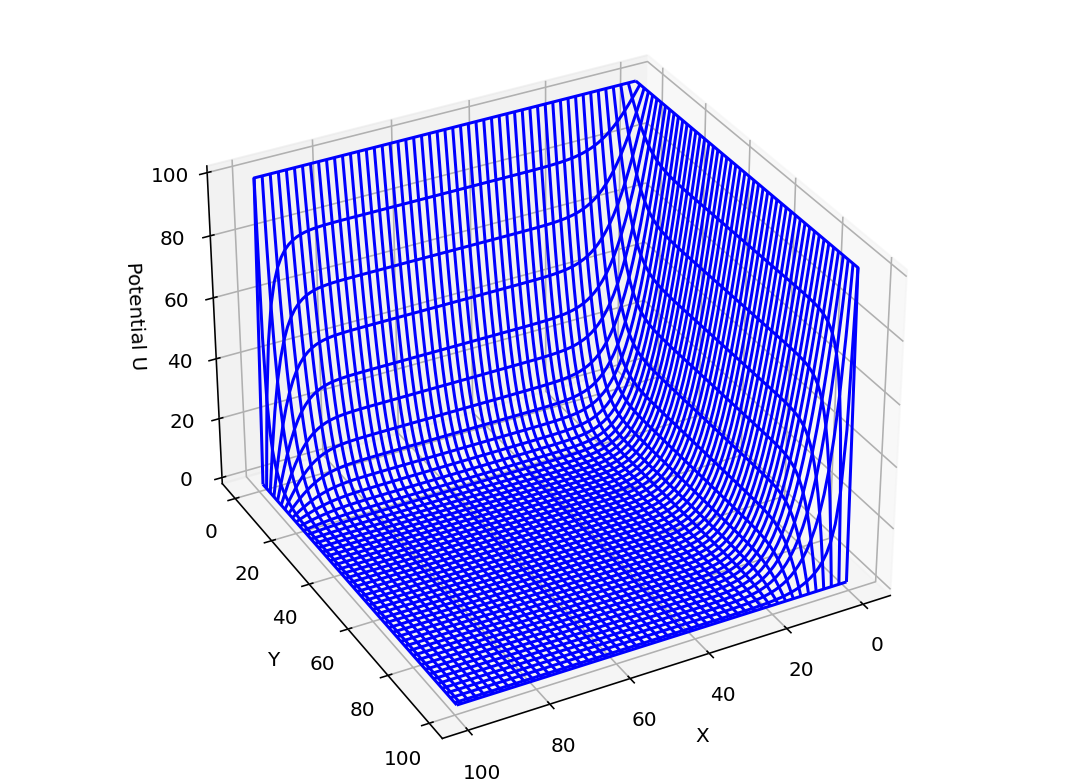

In [7]:
%matplotlib notebook
# LaplaceLine.py, Notebook Version

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Nmax = 100
Niter = 70
V = np.zeros((Nmax, Nmax))   

for k in range(0, Nmax-1): 
    V[k,0] = 100.0                              # fixed potential line at 100V
    V[0,k] = 100.0
    
for iter in range(Niter):                       # iterations over algorithm
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])  
x = range(0, Nmax)
y = range(0, Nmax)
X, Y = np.meshgrid(x,y)          

def functz(V):                                  # Function returns V(x, y)
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = plt.figure()                              # Create figure
ax = Axes3D(fig, auto_add_to_figure=False)      # Plots axes
fig.add_axes(ax)
ax.plot_wireframe(X, Y, Z, color = 'b')         
ax.set_xlabel('X')                              # label axes
ax.set_ylabel('Y')
ax.set_zlabel('Potential U')
plt.show()  

* What is the funny curl that happens at the front corner of this 3-D plot? Is there a way to remove that curve?
* How would you change the code to allow for different $h_x$ and $h_y$ values?

* How would you change the code to allow for a charge density placed somewhere on the surface?  Let's do that...

<IPython.core.display.Javascript object>


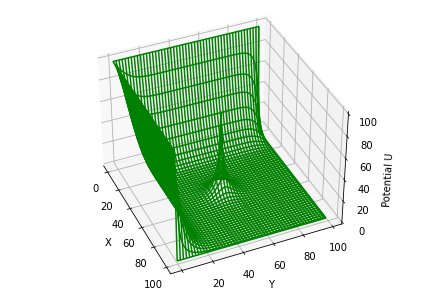

In [6]:
%matplotlib notebook
# Poisson's equation

Nmax = 100
Niter = 70
V = np.zeros((Nmax, Nmax))   

def rho(i,j):
    if (i==50 and j==50):
        return 10.
    else:
        return 0.

for k in range(0, Nmax-1): 
    V[k,0] = 100.0                              # fixed potential line at 100V
    V[0,k] = 100.0
    
for iter in range(Niter):                       # iterations over algorithm
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1]) + np.pi*rho(i,j)  
x = range(0, Nmax)
y = range(0, Nmax)
X, Y = np.meshgrid(x,y)          

def functz(V):                                  # Function returns V(x, y)
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = plt.figure()                              # Create figure
ax = Axes3D(fig, auto_add_to_figure=False)      # Plots axes
fig.add_axes(ax)
ax.plot_wireframe(X, Y, Z, color = 'g')         
ax.set_xlabel('X')                              # label axes
ax.set_ylabel('Y')
ax.set_zlabel('Potential U')
plt.show()  